In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from Utils import *

# Load the data
training_data = np.load('training_data.npy')
valid_periods = np.load('valid_periods.npy')
categories = np.load('categories.npy')

In [2]:
dataset, labels = build_sequences_optimized(training_data, valid_periods)

Dataset shape:  (48000, 200)


In [3]:
train_data, train_labels, test_data, test_labels = split_dataset(dataset, labels)

Train data shape:  (38400, 200)
Test data shape:  (9600, 200)


In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Reshape data for LSTM [samples, timesteps, features]
train_X = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
test_X = test_data.reshape((test_data.shape[0], 1, test_data.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))  # First LSTM layer with 100 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(50, return_sequences=False))  # Second LSTM layer with 50 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(18))  # Output layer
model.compile(loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()], optimizer='adam')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history = model.fit(train_X, train_labels, epochs=50, batch_size=72, validation_data=(test_X, test_labels), verbose=2, shuffle=False)#, callbacks=[early_stopping])

# Make predictions
yhat = model.predict(test_X)
predictions = yhat

Epoch 1/50
534/534 - 17s - loss: 0.0521 - root_mean_squared_error: 0.2282 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2002 - 17s/epoch - 32ms/step
Epoch 2/50
534/534 - 8s - loss: 0.0312 - root_mean_squared_error: 0.1765 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1926 - 8s/epoch - 15ms/step
Epoch 3/50
534/534 - 8s - loss: 0.0278 - root_mean_squared_error: 0.1668 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1883 - 8s/epoch - 15ms/step
Epoch 4/50
534/534 - 8s - loss: 0.0261 - root_mean_squared_error: 0.1615 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1859 - 8s/epoch - 15ms/step
Epoch 5/50
534/534 - 8s - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838 - 8s/epoch - 15ms/step
Epoch 6/50
534/534 - 8s - loss: 0.0246 - root_mean_squared_error: 0.1568 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1821 - 8s/epoch - 15ms/step
Epoch 7/50
534/534 - 8s - loss: 0.0239 - root_mean_squared_error: 0.1548 - val_l

MAE: 0.12213486462213899
MSE: 0.028784018131741133
RMSE: 0.16965853391957958
MAPE: 2056917980.2821777%


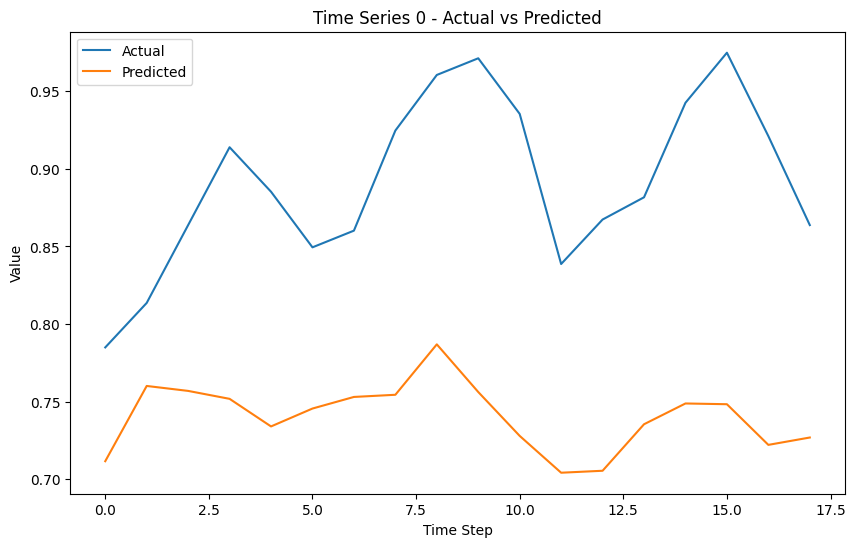

In [28]:
evaluate_model(predictions, test_labels)
for i in range(1):
    # Plot the first 5 predictions
    plot_predictions(predictions, test_labels, i)

In [20]:
## MORE COMPLEX MODEL, WITH ES IT PERFORMS WORSE

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Reshape data for LSTM [samples, timesteps, features]
train_X = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
test_X = test_data.reshape((test_data.shape[0], 1, test_data.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))  # First LSTM layer with 100 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(100, return_sequences=True))  # Second LSTM layer with 100 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(50, return_sequences=False))  # Third LSTM layer with 50 neurons
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(18))  # Output layer
model.compile(loss='mse', optimizer='adam')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history = model.fit(train_X, train_labels, epochs=100, batch_size=72, validation_data=(test_X, test_labels), verbose=2, shuffle=False, callbacks=[early_stopping])

# Make predictions
yhat = model.predict(test_X)
predictions = yhat

Epoch 1/100
534/534 - 22s - loss: 0.0564 - root_mean_squared_error: 0.2375 - val_loss: 0.0416 - val_root_mean_squared_error: 0.2038 - 22s/epoch - 41ms/step
Epoch 2/100
534/534 - 10s - loss: 0.0318 - root_mean_squared_error: 0.1784 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1962 - 10s/epoch - 19ms/step
Epoch 3/100
534/534 - 10s - loss: 0.0285 - root_mean_squared_error: 0.1687 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1910 - 10s/epoch - 19ms/step
Epoch 4/100
534/534 - 10s - loss: 0.0266 - root_mean_squared_error: 0.1632 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1889 - 10s/epoch - 19ms/step
Epoch 5/100
534/534 - 10s - loss: 0.0256 - root_mean_squared_error: 0.1599 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877 - 10s/epoch - 19ms/step
Epoch 6/100
534/534 - 10s - loss: 0.0249 - root_mean_squared_error: 0.1579 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1869 - 10s/epoch - 19ms/step
Epoch 7/100
534/534 - 10s - loss: 0.0244 - root_mean_squared_err